# Computational Fluid Dynamics final project - Lid Driven Cavity

## Student's Info

| Name | Surname | Student ID | UniTs email | Personal email | Master course |
|:---:|:---:|:---:|:---:|:---:|:---:|
| Piero | Zappi | SM3600004 | `piero.zappi@studenti.units.it` | `piero.z.2001@gmail.com` | SDIC |

## Introduction

In this part of the project, we are going to solve the lid-driven cavity problem using the simplified marker and cell method. The lid-driven cavity problem consists of a square cavity with a lid that is moving at constant velocity. The cavity is filled with a fluid and the motion of the lid causes the fluid to move. The fluid is assumed to be incompressible and the flow is assumed to be two-dimensional. The governing equations for this problem are the Navier-Stokes equations. The boundary conditions for this problem are no-slip boundary conditions on the walls of the cavity and a moving lid boundary condition on the lid of the cavity.

### Navier-Stokes equations

The 2D incompressible Navier-Stokes equations in the conservative form, which are the continuity equation and the momentum equations, are given by:

\begin{equation*}
\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}=0
\end{equation*}

\begin{equation*}
\frac{\partial u}{\partial t}=-\frac{\partial uu}{\partial x}-\frac{\partial vu}{\partial y}-\frac{\partial P}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)
\end{equation*}

\begin{equation*}
\frac{\partial v}{\partial t}=-\frac{\partial uv}{\partial x}-\frac{\partial vv}{\partial y}-\frac{\partial P}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)
\end{equation*}

where $\displaystyle{P=\frac{p}{\rho}}$ is the kinematic pressure, $u$ and $v$ are the velocity components in the $x$ and $y$ directions respectively, and $\displaystyle{\nu=\frac{\mu}{\rho}}$ is the kinematic viscosity; finally, we assume constant density $\displaystyle{\rho=1}$.

### Discretization

We employ a first order discretization in time and a second order discretization in space, obtaining:

\begin{equation*}
\frac{u_i^{n+1}-u_i^n}{\Delta t}=-ADV_i^n-\nabla P_i^{n+1}+DIFF_i^n \quad \text{for } i=1,2
\end{equation*}

where $\displaystyle{ADV_i^n}$ is the advection term, $\displaystyle{\nabla P_i^{n+1}}$ is the pressure gradient term, and $\displaystyle{DIFF_i^n}$ is the diffusion term.

### Boundary conditions

The boundary conditions for this problem are:

\begin{equation*}
u(x,0)=0, \quad u(x,1)=1, \quad u(0,y)=u(1,y)=0
\end{equation*}

\begin{equation*}
v(x,0)=v(x,1)=0, \quad v(0,y)=v(1,y)=0
\end{equation*}

\begin{equation*}
P(x,0)=P(x,1)=P(0,y)=P(1,y)=0
\end{equation*}

We therefore use the homogeneus Neumann boundary conditions for the pressure field.

### S-MAC method

We use the simplified marker and cell (S-MAC) method to solve the Navier-Stokes equations, which is a finite difference method.

We divide the problem into two steps: the first step is the predictor step, where we calculate the intermediate velocity field $\displaystyle{u^*,v^*}$, and the second step is the corrector step, where we calculate the velocity field $\displaystyle{u,v}$, after having computed the pressure field $\displaystyle{P}$.

#### Predictor step

The predictor step is given by:

\begin{equation*}
\frac{u_i^*-u_i^n}{\Delta t}=-ADV_i^n +DIFF_i^n \quad \text{for } i=1,2
\end{equation*}

We are going to solve this advection-diffusion equation using an explicit scheme and obtain the intermediate velocity field $\displaystyle{u^*,v^*}$.

#### Corrector step

The corrector step is given by:

\begin{equation*}
\frac{u_i^{n+1}-u_i^*}{\Delta t}=-\nabla P_i^{n+1} \quad \text{for } i=1,2
\end{equation*}

We are going to compute the velocity field $\displaystyle{u,v}$ using the intermediate velocity field $\displaystyle{u^*,v^*}$ and the pressure field $\displaystyle{P}$.

To obtain the pressure field $\displaystyle{P}$, we solve a Poisson equation; applying the divergence operator to the last equation and using the continuity equation ($\displaystyle{\nabla u_i^{n+1}=0}$), we obtain:

\begin{equation*}
\Delta P^{n+1}_i=\frac{\nabla u^*_i}{\Delta t}
\end{equation*}

We are going to solve this Poisson equation using the Jacobi iterative method and get the pressure field $\displaystyle{P^{n+1}}$. Before solving the Poisson equation, we need to compute the divergence of the intermediate velocity field $\displaystyle{u^*,v^*}$, which is going to be used as the right-hand side term of the system; to do so, we will use a centered scheme.

Finally, we are going to compute the velocity field $\displaystyle{u,v}$ for the next time step:

\begin{equation*}
u_i^{n+1}=u_i^*-\Delta t\frac{\partial P^{n+1}}{\partial x_i} \quad \text{for } i=1,2
\end{equation*}

In particular, also in this case we will use a centered scheme to compute the pressure gradient.

### Implementation

The code is written in Python. We use a square domain with side length $\displaystyle{L=1}$ and a time step $\displaystyle{\Delta t=10^{-4}}$.

We use a uniform grid to discretize the domain, with Reynolds number $\displaystyle{Re=100}$ and $\displaystyle{\nu=0.01}$. Specifically, we decided to employ a simple colocated grid, where the velocity components and the pressure are stored at the same grid points.

## Code

Let's start by importing the necessary libraries.

In [145]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Then we define the parameters of the problem and create the grid.

In [146]:
# Parameters

# Side length of the square
L = 1
# Number of cells in each direction
Nx = 50
Ny = 50 # We use a square grid, so Nx = Ny
# Time step
dt = 0.0001
# Viscosity
nu = 0.01
# Reynolds number
Re = 100
# Space steps
dx = L / (Nx - 1)
dy = L / (Ny - 1)
# Number of time steps
Nt = 60000


In [147]:
# Create the space grid
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
Y, X = np.meshgrid(y, x)

We now define some functions that we are going to use in the code:

- `check_stability`: checks the stability conditions of the scheme;
- `build_A_N`: builds the matrices we need to solve the Poisson equation using the Jacobi iterative method;
- `set_initial_conditions`: sets the initial conditions of the problem.

In [148]:
# Function to check the stability conditions
def check_stability(dx, dy, dt, Re, u, v):
    # Courant number
    Cu = dt * (np.max(np.abs(u)) / dx + np.max(np.abs(v)) / dy)
    if Cu > 1:
        # Throw an error
        raise ValueError('Courant number is greater than 1')
    # Diffusion number
    Beta_x = dt / (dx**2 * Re)
    Beta_y = dt / (dy**2 * Re)
    if Beta_x > 0.25 or Beta_y > 0.25:
        # Throw an error
        raise ValueError('Diffusion number is greater than 0.25')

In [149]:
# Function to build the matrices A and N for the Poisson equation (A*P = b)
# (We need the matrix for the Jacobi method)
def build_A_N(Nx):
    # Dimension of the matrix
    N = Nx * Nx
    # Initialize the matrices
    A = np.zeros((N, N))
    D = np.zeros((N, N))
    # Fill the matrices
    for j in range(1, Nx-1):
        for i in range(1, Nx-1):
            index_ij  = Nx*j + i
            index_top = Nx*(j+1) + i
            index_bot = Nx*(j-1) + i
            index_lef = Nx*j + i - 1
            index_rig = Nx*j + i + 1

            A[index_ij, index_ij]  = -4
            A[index_ij, index_rig] =  1  # right coeff
            A[index_ij, index_lef] =  1  # left coeff
            A[index_ij, index_bot] =  1  # bottom coeff
            A[index_ij, index_lef] =  1  # top coeff
    # Correct the boundary conditions
    j = 0
    # Top boundary
    for i in range(1, Nx-1):
        index_ij  =  i
        index_bot =  Nx + i
        A[index_ij,  index_ij]     = -4    
        A[index_ij,  index_ij + 1] =  1         # right coeff
        A[index_ij,  index_ij - 1] =  1         # left coeff
        A[index_ij,  index_bot]    =  2         # bottom coeff - vertical derivative = 0
    j = Nx - 1
    # Bottom boundary
    for i in range(1, Nx-1):
        index_ij  = Nx*j + i
        index_top = Nx*(j-1) + i
        A[index_ij, index_ij]     = -4
        A[index_ij, index_ij + 1] =  1  # right coeff
        A[index_ij, index_ij - 1] =  1  # left coeff
        A[index_ij, index_top]    =  2  # top coeff - vertical derivative = 0
    i = 0
    # Left boundary
    for j in range(1, Nx-1):
        index_ij  = Nx*j + i
        index_top = Nx*(j-1) + i
        index_bot = Nx*(j+1) + i
        A[index_ij, index_ij]     = -4
        A[index_ij, index_ij + 1] =  2 # right coeff
        A[index_ij, index_top]    =  1 # top coeff
        A[index_ij, index_bot]    =  1 # bottom coeff
    i = Nx - 1
    # Right boundary
    for j in range(1, Nx-1):
        index_ij  = Nx*j + i
        index_top = Nx*(j-1) + i
        index_bot = Nx*(j+1) + i
        A[index_ij, index_ij]     = -4
        A[index_ij, index_ij - 1] =  2 # left coeff
        A[index_ij, index_top]    =  1 # top coeff
        A[index_ij, index_bot]    =  1 # bottom coeff
    # Corners
    A[0, 0] = 1
    A[N-1, N-1] = 1
    A[Nx-1, Nx-1] = 1
    A[Nx*(Nx-1), Nx*(Nx-1)] = 1
    # Create the diagonal matrix N
    for i in range(N):
        D[i, i] = A[i, i]
    # Compute the inverse of N
    N_inv = np.linalg.inv(D)
    # Return the matrices
    return A, D, N_inv


In [150]:
# Function to set the initial conditions
def set_initial_conditions(Nx, Ny, Nt):
    # Initialize the fields
    u = np.zeros((Nx, Ny, Nt))
    v = np.zeros((Nx, Ny, Nt))
    P = np.zeros((Nx, Ny, Nt))
    # Return the fields
    return u, v, P

Let's now call these functions to check if everything is working correctly.

In [151]:
# Set the initial conditions
u, v, P = set_initial_conditions(Nx, Ny, Nt)

# Create the matrices A and N for the Poisson equation
A, N, N_inv = build_A_N(Nx)

# Check the stability conditions
check_stability(dx, dy, dt, Re, u, v)

# Print matrix A to check if it is correct
#for i in range(Nx*Nx):
#    for j in range(Nx*Nx):
#        print(A[i, j], end=' ')
#    print()

We can now implement the main part of the code and solve the lid-driven cavity problem using the S-MAC method.

In [152]:
# Initialize the intermediate velocity field
u_star = np.zeros((Nx, Ny))
v_star = np.zeros((Nx, Ny))

# Define some auxiliary useful variables and some parameters
alphax = dt/(2*dx)
alphay = dt/(2*dy)
betax = (nu*dt)/(dx**2)
betay = (nu*dt)/(dy**2)

adv_u = np.zeros((Nx, Ny)) # advection term along x
adv_v = np.zeros((Nx, Ny)) # advection term along y
diff_u = np.zeros((Nx, Ny)) # diffusion term along x
diff_v = np.zeros((Nx, Ny)) # diffusion term along y

source_u = np.zeros((Nx, Ny)) # source term for the Poisson equation along x
source_v = np.zeros((Nx, Ny)) # source term for the Poisson equation along y

source_vector = np.zeros((Nx*Ny)) # source term vector for the Poisson equation
P_vector = np.zeros((Nx*Ny)) # pressure field vector for the Poisson equation

grad_Px = np.zeros((Nx, Ny)) # gradient of the pressure field along x
grad_Py = np.zeros((Nx, Ny)) # gradient of the pressure field along y

nitermax = 300 # maximum number of iterations for the Jacobi method
eps = 0.000001 # tolerance for the Jacobi method

u_plot = np.zeros((Nt)) # array to store the u component of the velocity field at the middle of the domain

# Main time loop to solve the Navier-Stokes equations for the lid-driven cavity problem using the S-MAC method
for t in range(1, Nt):
    
    # PREDICTOR step to obtain the intermediate velocity field
    # We solve the advection-diffusion equations
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            adv_u[i, j] = -alphax * (u[i+1, j, t-1] * u[i+1, j, t-1] - u[i-1, j, t-1] * u[i-1, j, t-1]) - alphay * (u[i, j+1, t-1] * v[i, j+1, t-1] - u[i, j-1, t-1] * v[i, j-1, t-1]) # advection term
            diff_u[i, j] = betax * (u[i+1, j, t-1] - 2*u[i, j, t-1] + u[i-1, j, t-1]) + betay * (u[i, j+1, t-1] - 2*u[i, j, t-1] + u[i, j-1, t-1]) # diffusion term
            u_star[i, j] = u[i, j, t-1] + (adv_u[i, j] + diff_u[i, j]) # intermediate velocity field u_star
            adv_v[i, j] = -alphax * (v[i+1, j, t-1] * u[i+1, j, t-1] - v[i-1, j, t-1] * u[i-1, j, t-1]) - alphay * (v[i, j+1, t-1] * v[i, j+1, t-1] - v[i, j-1, t-1] * v[i, j-1, t-1]) # advection term
            diff_v[i, j] = betax * (v[i+1, j, t-1] - 2*v[i, j, t-1] + v[i-1, j, t-1]) + betay * (v[i, j+1, t-1] - 2*v[i, j, t-1] + v[i, j-1, t-1]) # diffusion term
            v_star[i, j] = v[i, j, t-1] + (adv_v[i, j] + diff_v[i, j]) # intermediate velocity field v_star
    
    # We now have to obtain the pressure field: to do so, we solve the Poisson equation using the Jacobi method
    # We have to set up the linear system A*P = b
    # We have to compute b first
    
    # Compute the source term for the Poisson equation
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            source_u[i, j] = (u_star[i+1, j] - u_star[i-1, j]) / (2*dx) # source term along x
            source_v[i, j] = (v_star[i, j+1] - v_star[i, j-1]) / (2*dy) # source term along y
    
    # Apply the boundary conditions for the source term
    source_u[0, :] = 0
    source_u[-1, :] = 0
    source_u[:, 0] = 0
    source_u[:, -1] = 0
    source_v[0, :] = 0
    source_v[-1, :] = 0
    source_v[:, 0] = 0
    source_v[:, -1] = 0
    
    # Fill the source term vector (also the pressure field has to be reshaped as a 1D vector)
    count = 0
    for i in range(0, Nx):
        for j in range(0, Ny):
            source_vector[count] = ((source_u[i, j] + source_v[i, j]) / dt) * dx**2 # (Assuming dx = dy)
            P_vector[count] = P[i, j, t-1]
            count += 1
            
    # Rename the source term vector and the pressure field vector
    b = source_vector
    # (The initial guess for the pressure field vector is the one at the previous time step)
    xk = P_vector
    
    # Jacobi method to solve the Poisson equation and obtain the pressure field
    count_iter = 1 # iteration counter
    res_mod = 1 # residual
    while count_iter < nitermax and res_mod > eps:
        res = A @ xk - b
        xk_new = xk - N_inv @ res
        res_mod = np.linalg.norm(A @ xk_new - b) # compute the residual magnitude
        xk = xk_new
        count_iter += 1
    #Check if the Jacobi method has converged
    if count_iter == nitermax:
        print(t)
        raise ValueError('The Jacobi method has not converged')
    # Print the number of iterations
    if t % 200 == 0:
        print("Time step: ", t)
        print("Number of iterations: ", count_iter)
    
    # We now have the pressure field
    # Reshape the pressure field vector as a 2D matrix
    count = 0
    for i in range(0, Nx):
        for j in range(0, Ny):
            P[i, j, t] = xk_new[count]
            count += 1
    
    # Apply the boundary conditions for the pressure field (Homogeneous Neumann boundary conditions)
    P[:, Nx-1, t] = P[:, Nx-2, t]
    P[0, :, t] = P[1, :, t]
    P[Nx-1, :, t] = P[Nx-2, :, t]
    P[:, 0, t] = P[:, 1, t]
    
    # CORRECTOR step to obtain the velocity field at the next time step
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            grad_Px[i, j] = (P[i+1, j, t] - P[i-1, j, t]) / (2*dx) # gradient of the pressure field along x
            grad_Py[i, j] = (P[i, j+1, t] - P[i, j-1, t]) / (2*dy) # gradient of the pressure field along y
            
    # Compute the velocity field at the next time step using the gradient of the pressure field
    u[:, :, t] = u_star[:, :] - dt * grad_Px
    v[:, :, t] = v_star[:, :] - dt * grad_Py
            
    # We now have the velocity field at the next time step
    
    # Apply the boundary conditions
    # (In the square domain [0,1]x[0,1], the velocity field is zero on all the boundaries except for the top one, where the u component is 1 and the v component is 0)
    u[0, :, t] = 0
    v[0, :, t] = 0
    u[-1, :, t] = 0
    v[-1, :, t] = 0
    u[:, 0, t] = 0
    v[:, 0, t] = 0
    u[:, -1, t] = 1
    v[:, -1, t] = 0
    
    # Store the u component of the velocity field at the middle of the domain
    u_plot[t] = u[int(Nx/2), int(Ny/2), t]
    
    # Check the stability conditions
    check_stability(dx, dy, dt, Re, u, v)
    

Time step:  200
Number of iterations:  74
Time step:  400
Number of iterations:  73
Time step:  600
Number of iterations:  73
Time step:  800
Number of iterations:  73
Time step:  1000
Number of iterations:  73
Time step:  1200
Number of iterations:  72
Time step:  1400
Number of iterations:  72
Time step:  1600
Number of iterations:  72
Time step:  1800
Number of iterations:  72
Time step:  2000
Number of iterations:  72
Time step:  2200
Number of iterations:  73
Time step:  2400
Number of iterations:  73
Time step:  2600
Number of iterations:  73
Time step:  2800
Number of iterations:  73
Time step:  3000
Number of iterations:  73
Time step:  3200
Number of iterations:  73
Time step:  3400
Number of iterations:  73
Time step:  3600
Number of iterations:  73
Time step:  3800
Number of iterations:  73
Time step:  4000
Number of iterations:  73
Time step:  4200
Number of iterations:  73
Time step:  4400
Number of iterations:  73
Time step:  4600
Number of iterations:  73
Time step:  480

Let's now plot the results and see if everything is working correctly.

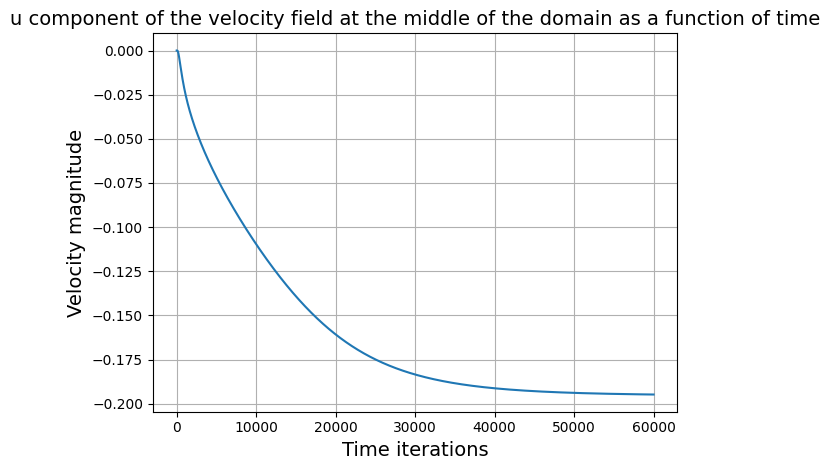

In [153]:
# Plot the velocity field (u component) at the middle of the domain as a function of time
# (We can see if the velocity field reaches a steady state)
plt.plot(u_plot)
plt.xlabel('Time iterations', fontsize=14)
plt.ylabel('Velocity magnitude', fontsize=14)
plt.title('u component of the velocity field at the middle of the domain as a function of time', fontsize=14)
plt.tight_layout()
plt.grid()
plt.show()

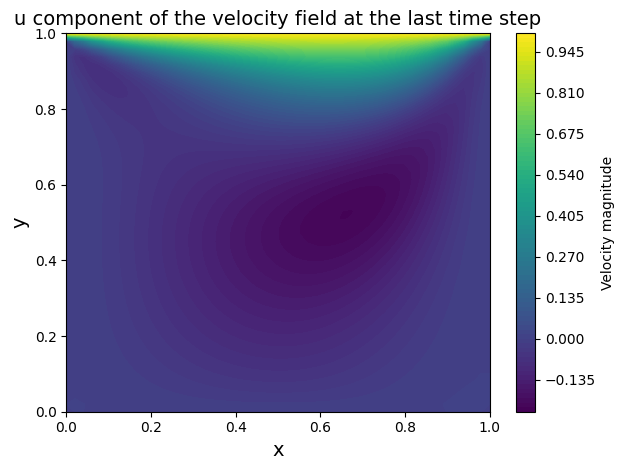

In [154]:
# Plot the velocity field (u component) in the whole domain at the last time step using a contour plot
plt.contourf(X, Y, u[:, :, Nt-1], 100, cmap='viridis')
plt.colorbar(label='Velocity magnitude')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('u component of the velocity field at the last time step', fontsize=14)
plt.tight_layout()  # Adjust layout
plt.show()

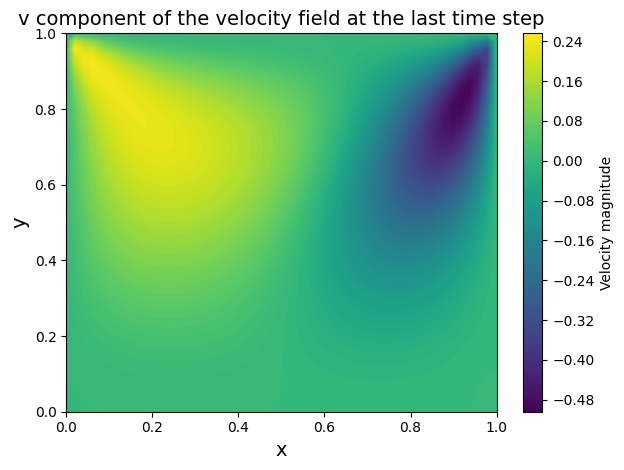

In [155]:
# Plot the velocity field (v component) in the whole domain at the last time step using a contour plot
plt.contourf(X, Y, v[:, :, Nt-1], 100, cmap='viridis')
plt.colorbar(label='Velocity magnitude')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('v component of the velocity field at the last time step', fontsize=14)
plt.tight_layout()  # Adjust layout
plt.show()

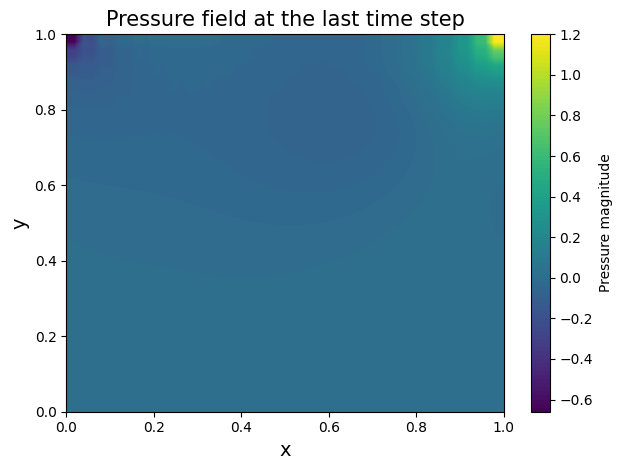

In [156]:
# Plot the pressure field in the whole domain at the last time step using a contour plot
plt.contourf(X, Y, P[:, :, Nt-1], 100, cmap='viridis')
plt.colorbar(label='Pressure magnitude')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Pressure field at the last time step', fontsize=15)
plt.tight_layout()  # Adjust layout
plt.show()

Let's compare the results with the ones of Ghia et al. for $\displaystyle{Re=100}$.

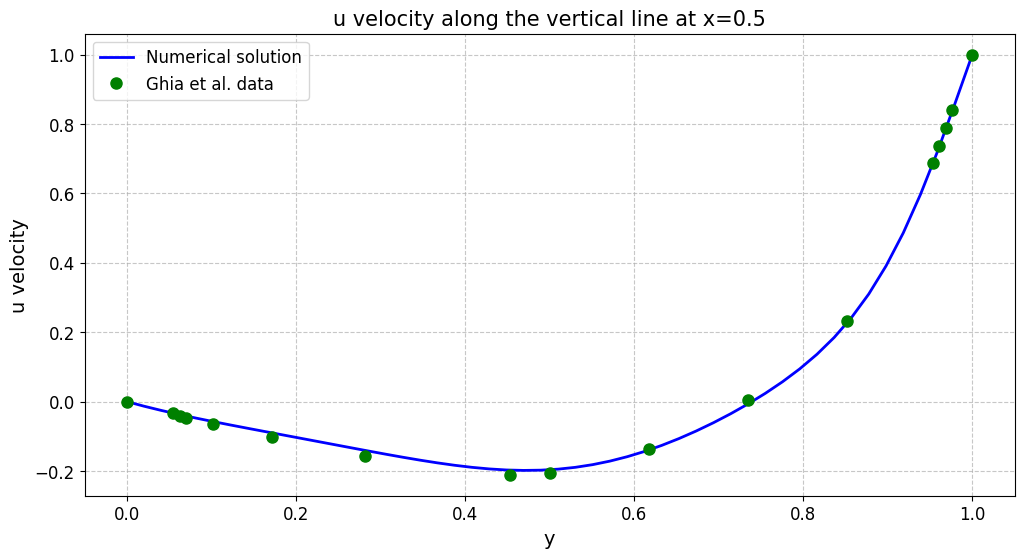

In [157]:
# Create a dataframe with the data of Ghia et al.
y_ghia = np.array([0.0000, 0.0547, 0.0625, 0.0703, 0.1016, 0.1719, 0.2813, 0.4531, 0.5000, 0.6172, 0.7344, 0.8516, 0.9531, 0.9609, 0.9688, 0.9766, 1.0000])
u_ghia = np.array([0.00000, -0.03371, -0.04192, -0.04775, -0.06434, -0.10150, -0.15662, -0.21090, -0.20581, -0.13641, 0.00332, 0.23151, 0.68717, 0.73722, 0.78871, 0.84123, 1.00000])
ghia_data_u = pd.DataFrame({'y': y_ghia, 'u': u_ghia})

# Plot the u velocity along the vertical line x=0.5 at the last time step
plt.figure(figsize=(12, 6))
plt.plot(y, u[int(Nx/2), :, Nt-1], 'b-', linewidth=2, label='Numerical solution')
plt.plot(ghia_data_u['y'], ghia_data_u['u'], 'go', markersize=8, label='Ghia et al. data')
plt.xlabel('y', fontsize=14)
plt.ylabel('u velocity', fontsize=14)
plt.title('u velocity along the vertical line at x=0.5', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

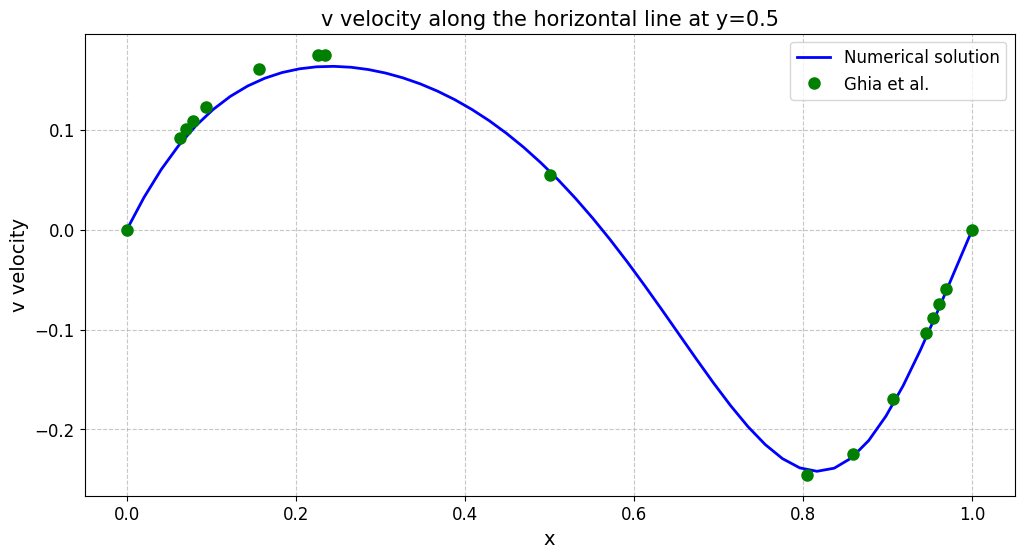

In [158]:
# Create a dataframe with the data of Ghia et al.
x_ghia = np.array([0.0000, 0.0625, 0.0703, 0.0781, 0.0938, 0.1563, 0.2266, 0.2344, 0.5000, 0.8047, 0.8594, 0.9063, 0.9453, 0.9531, 0.9609, 0.9688, 1.0000])
v_ghia = np.array([0.00000, 0.09233, 0.10091, 0.10890, 0.12317, 0.16077, 0.17507, 0.17527, 0.05454, -0.24533, -0.22445, -0.16914, -0.10313, -0.08864, -0.07391, -0.05906, 0.00000])
ghia_data_v = pd.DataFrame({'x': x_ghia, 'v': v_ghia})

# Plot the v velocity along the horizontal line y=0.5 at the last time step
plt.figure(figsize=(12, 6))
plt.plot(x, v[:, int(Ny/2), Nt-1], 'b-', linewidth=2, label='Numerical solution')
plt.plot(ghia_data_v['x'], ghia_data_v['v'], 'go', markersize=8, label='Ghia et al.')
plt.xlabel('x', fontsize=14)
plt.ylabel('v velocity', fontsize=14)
plt.title('v velocity along the horizontal line at y=0.5', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()